# Image block segmentation: Part II

## Recap

In the previous section, we were researching how to answer the following questions:
* *How can we “read” the article above in a programmatic way?*
* *We would need to isolate various elements in the photo like the title and captions, which are larger than the body text.*

In the attempt to automate image annotation, we explored use of the height heuristics approach.

In this section, I look into using an already annotated image, containing 1px wide bounding boxes of colour green i.e. `(0,232,72)` in terms of rgb code and `#00E848` in terms of hex code.

## I) Image Importation

In [1]:
!pip install Pillow
!pip install numpy
!pip install opencv-python-headless

In [2]:
from PIL import Image # Pillow package
import cv2 # Open CV package
import pandas as pd # Pandas package
import numpy as np # Numpy package

In [3]:
try:
    sample_image_path = "./kip-images/17_12_2021_Nation_MyNetWork_pg9 annotated (1px).png"
    image = Image.open(sample_image_path)

except:
    sample_image_path = r"/home/jovyan/book/kenyans-in-print/kip-images/17_12_2021_Nation_MyNetWork_pg9 annotated (1px).png"
    image = Image.open(sample_image_path)

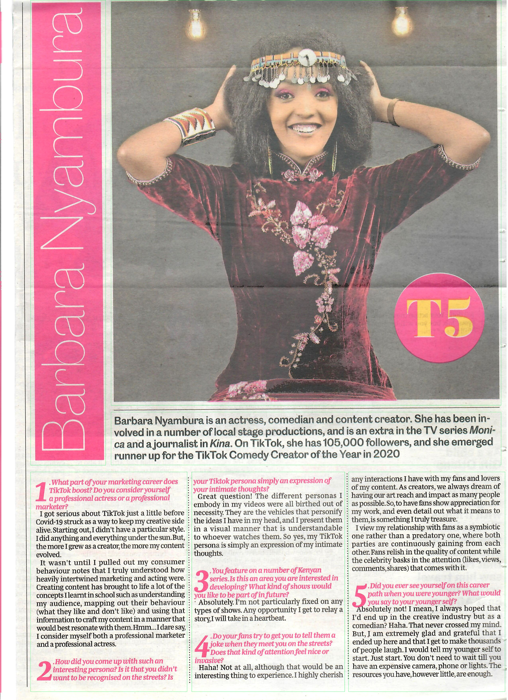

In [4]:
width, height = image.size
display(image.resize(
    (int(width*0.2),int(height*0.2))
    ))

## II) Identification of Bounding Box Coordinates

### Attempt 1: Use of the image rendered as a 3d array

When importing an image using `OpenCV` package, the image is transformed into a 3d array.

In [5]:
cv2.imread(sample_image_path).shape

(3504, 2544, 3)

In colour images:

* The first dimension shows the vertical aspect of the image, with values ranging from 0 to 255
* The second dimension shows the horizontal aspect of the image, with values ranging from 0 to 255
* The last dimension has size 3, representing the red, green, and blue channels

This can be visualised as shown:
![Image visualization](./kip-images/image-representation.png)

Thus, white is represented in rgb code as `(255,255,255)` and black is represented as `(0,0,0)`

Images can also include transparent regions by adding a 4th dimension, called an *alpha* layer.

In [6]:
pd.DataFrame(cv2.imread(sample_image_path)[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543
0,188,199,209,216,228,244,254,255,255,255,...,211,211,208,253,254,255,254,253,255,253
1,188,199,209,216,228,244,254,255,255,255,...,209,208,207,253,254,255,254,253,255,253
2,186,199,210,218,231,246,255,255,255,255,...,205,205,206,253,254,255,254,253,255,254
3,185,198,211,220,232,247,255,255,255,255,...,202,202,203,253,254,255,255,254,255,254
4,183,197,211,221,233,248,255,255,255,255,...,201,200,201,253,254,255,255,254,255,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,153,198,240,255,254,251,251,255,255,255,...,195,198,195,250,255,254,254,254,253,255
3500,155,202,244,255,255,255,254,255,255,255,...,191,194,195,247,255,255,251,252,255,255
3501,162,209,246,252,253,255,255,250,255,255,...,192,193,200,249,253,255,255,255,253,254
3502,155,208,250,255,251,252,254,253,255,255,...,189,192,185,249,255,252,255,255,252,255


In [7]:
pd.DataFrame(cv2.imread(sample_image_path)[:,:,1])

,0,1,2,3,4,5,6,7,8,9,...,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543
0,188,199,209,216,228,244,254,255,255,255,...,213,213,210,255,254,255,254,253,255,253
1,188,199,209,216,228,244,254,255,255,255,...,211,210,209,255,254,255,254,253,255,253
2,186,199,210,218,231,246,255,255,255,255,...,207,207,208,255,254,255,254,253,255,254
3,185,198,211,220,232,247,255,255,255,255,...,204,204,205,255,254,255,255,254,255,254
4,183,197,211,221,233,248,255,255,255,255,...,203,202,203,255,254,255,255,254,255,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,153,198,240,255,254,251,251,255,255,255,...,207,206,200,255,255,252,254,255,254,255
3500,155,202,244,255,255,255,254,255,255,255,...,203,201,200,251,255,255,251,252,255,255
3501,162,209,246,252,253,255,255,250,255,255,...,201,199,205,253,253,253,255,255,254,255
3502,155,208,250,255,251,252,254,253,255,255,...,198,196,190,253,254,250,255,255,252,255


In [8]:
pd.DataFrame(cv2.imread(sample_image_path)[:,:,2])

,0,1,2,3,4,5,6,7,8,9,...,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543
0,188,199,209,216,228,244,254,255,255,255,...,213,213,210,255,254,255,254,253,255,253
1,188,199,209,216,228,244,254,255,255,255,...,211,210,209,255,254,255,254,253,255,253
2,186,199,210,218,231,246,255,255,255,255,...,207,207,208,255,254,255,254,253,255,254
3,185,198,211,220,232,247,255,255,255,255,...,204,204,205,255,254,255,255,254,255,254
4,183,197,211,221,233,248,255,255,255,255,...,203,202,203,255,254,255,255,254,255,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,153,198,240,255,254,251,251,255,255,255,...,207,206,201,254,255,252,254,253,252,254
3500,155,202,244,255,255,255,254,255,255,255,...,205,204,201,252,255,255,251,252,254,254
3501,162,209,246,252,253,255,255,250,255,255,...,205,204,206,254,253,253,255,255,252,253
3502,155,208,250,255,251,252,254,253,255,255,...,202,201,191,254,255,250,255,255,252,254


*Are all three of the 3504 x 2544 dataframes identical to each other?*

In [9]:
print(pd.DataFrame(cv2.imread(sample_image_path)[:,:,0]).equals(pd.DataFrame(cv2.imread(sample_image_path)[:,:,1])),
      '\n',
      pd.DataFrame(cv2.imread(sample_image_path)[:,:,0]).equals(pd.DataFrame(cv2.imread(sample_image_path)[:,:,2])),
      '\n',
      pd.DataFrame(cv2.imread(sample_image_path)[:,:,1]).equals(pd.DataFrame(cv2.imread(sample_image_path)[:,:,2])))

False 
 False 
 False


Another way to visualize the image is as a series of 3,504 dataframes that are of 2544 rows (2nd dimension) by 3 columns (3rd dimensions). These dataframes are also unique, as shown below:

In [10]:
pd.DataFrame(cv2.imread(sample_image_path)[0])

,0,1,2
0,188,188,188
1,199,199,199
2,209,209,209
3,216,216,216
4,228,228,228
...,...,...,...
2539,255,255,255
2540,254,254,254
2541,253,253,253
2542,255,255,255


In [11]:
pd.DataFrame(cv2.imread(sample_image_path)[3503])

,0,1,2
0,166,166,166
1,209,209,209
2,246,246,246
3,255,255,255
4,254,254,254
...,...,...,...
2539,253,251,251
2540,252,252,252
2541,253,253,253
2542,254,254,254


It therefore follows that we would need to find the "slices" that have this unique combination of the values of interest i.e. `(0,232,72)`, like the "slice" at index 0:

In [12]:
pd.DataFrame(cv2.imread(sample_image_path)[0])[pd.DataFrame(cv2.imread(sample_image_path)[0])[2] == 0]

,0,1,2
153,72,232,0
154,72,232,0
155,72,232,0
156,72,232,0
157,72,232,0
...,...,...,...
2505,72,232,0
2506,72,232,0
2507,72,232,0
2508,72,232,0


For this particular "slice", key assumptions are:
* Horizontal lines would share an identical $x$ value and have $y$ values that follow an unbroken sequence
* Vertical lines would share an identical $y$ value and have $x$ values that follow an unbroken sequence

In [13]:
len(pd.DataFrame(cv2.imread(sample_image_path)[0])[pd.DataFrame(cv2.imread(sample_image_path)[0])[2] == 0].index)

print(2330/30)

77.66666666666667


In [14]:
horizontal_indices = list(pd.DataFrame(cv2.imread(sample_image_path)[0])[pd.DataFrame(cv2.imread(sample_image_path)[0])[2] == 0].index)

tail_values = []
for i in range(1,79):
    tail_values.append(i*30)

head_values = [0] + tail_values[0:len(tail_values)-1]

for i in range(len(head_values)):
    print(horizontal_indices[head_values[i]:tail_values[i]])
    print(horizontal_indices[head_values[i]:tail_values[i]] == list(range(
        horizontal_indices[head_values[i]:tail_values[i]][0],
        horizontal_indices[head_values[i]:tail_values[i]][len(horizontal_indices[head_values[i]:tail_values[i]])-1]+1)
    ))

[153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182]
True
[183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]
True
[213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242]
True
[243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
True
[273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302]
True
[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]
True
[333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345

As shown above, 1 break was detected in the green horizontal line, leading me to believe these are the horizontal lines at position 0 on the vertical axis, shown below:

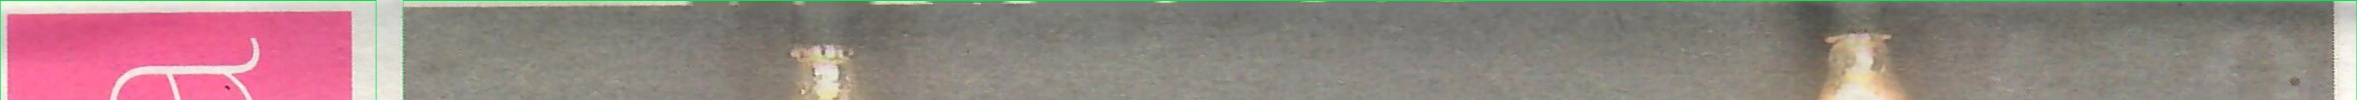

In [15]:
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cropped = Image.fromarray(img[0:100,153:2510]) 

display(cropped)

Based on this finding, we need to find "slices" that have traces of the colour to know the stopping points on the "y" axis of the image

In [16]:
verticals = []
for i in range(500):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

Slice no. 0


,0,1,2
153,72,232,0
154,72,232,0
155,72,232,0
156,72,232,0
157,72,232,0
...,...,...,...
2505,72,232,0
2506,72,232,0
2507,72,232,0
2508,72,232,0


In [17]:
for i in range(500,1000):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

In [18]:
for i in range(1000,1500):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

In [19]:
for i in range(1500,2000):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

In [20]:
for i in range(2000,2500):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

Slice no. 2028


,0,1,2
556,72,232,0
557,72,232,0
558,72,232,0
559,72,232,0
560,72,232,0
...,...,...,...
2505,72,232,0
2506,72,232,0
2507,72,232,0
2508,72,232,0




Slice no. 2328


,0,1,2
153,72,232,0
154,72,232,0
155,72,232,0
156,72,232,0
157,72,232,0
...,...,...,...
524,72,232,0
525,72,232,0
526,72,232,0
527,72,232,0




Slice no. 2362


,0,1,2
960,72,232,0


In [21]:
for i in range(2500,3000):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

In [22]:
for i in range(3000,3504):# of 3504
    if pd.DataFrame(cv2.imread(sample_image_path)[i])[
        ((pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[1] == 232) & (pd.DataFrame(cv2.imread(sample_image_path)[i])[0] == 72))
    ].shape[0] > 0:
        verticals.append(i)
        print(f"Slice no. {i}")
        display(pd.DataFrame(cv2.imread(sample_image_path)[i])[pd.DataFrame(cv2.imread(sample_image_path)[i])[2] == 0])
        print("\n")

Slice no. 3461


,0,1,2
960,72,232,0


In [23]:
verticals

[0, 2028, 2328, 2362, 3461]

## References
* https://stackoverflow.com/questions/51164713/how-to-get-pixel-coordinates-if-i-know-colorrgb
* https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python
* https://stackoverflow.com/questions/50624389/how-to-group-list-of-tuples
* https://scikit-image.org/skimage-tutorials/lectures/00_images_are_arrays.html
* https://www.statology.org/pandas-loc-multiple-conditions/